In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Project/merged_output.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'listing_id ', 'date', 'available', 'price',
       'adjusted_price', 'minimum_nights', 'maximum_nights', 'available_unit',
       'id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price.1',
       'minimum_nights.1', 'maximum_nights.1', 'minimum_minimum_nights',
   

In [4]:
df.shape

(1059, 90)

In [5]:
df.head(5)

,Unnamed: 0,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,available_unit,id,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,id.1,date.1,reviewer_id,reviewer_name,comments
0,0,958.0,04-09-2024,t,$170.00,NaN,2.0,1125.0,8.0,5.048937e+07,...,1.0,0.0,0.0,0.03,958.0,5977.0,2009-07-23,15695.0,Edmund C,"Our experience was, without a doubt, a five st..."
1,1,958.0,05-09-2024,f,$170.00,NaN,2.0,1125.0,6.0,5.368794e+07,...,0.0,1.0,0.0,0.63,958.0,6660.0,2009-08-03,26145.0,Simon,Returning to San Francisco is a rejuvenating t...
2,2,958.0,06-09-2024,f,$170.00,NaN,2.0,1125.0,6.0,6.238333e+17,...,1.0,1.0,0.0,0.57,958.0,11519.0,2009-09-27,25839.0,Denis,We were very pleased with the accommodations a...
3,3,958.0,07-09-2024,f,$170.00,NaN,2.0,1125.0,2.0,5.381702e+07,...,1.0,1.0,0.0,1.24,958.0,16282.0,2009-11-05,33750.0,Anna,We highly recommend this accomodation and agre...
4,4,958.0,08-09-2024,f,$170.00,NaN,2.0,1125.0,8.0,5.438139e+07,...,1.0,0.0,0.0,0.34,958.0,26008.0,2010-02-13,15416.0,V Jillian,Holly's place was great. It was exactly what I...


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Project/merged_output.csv')

In [7]:
#Find any duplicate column by heading and delete it
columns_to_delete = df.columns[df.columns.str.strip().duplicated()].unique()
if len(columns_to_delete) > 0:
  print("Duplicate columns to delete:", list(columns_to_delete))
  df = df.drop(columns=columns_to_delete)
columns_to_delete = df.columns[df.columns.str.strip('.1').duplicated()].unique()
if len(columns_to_delete) > 0:
  print("Duplicate columns to delete:", list(columns_to_delete))
  df = df.drop(columns=columns_to_delete)


Duplicate columns to delete: ['listing_id']
Duplicate columns to delete: ['price.1', 'minimum_nights.1', 'maximum_nights.1', 'id.1', 'date.1']


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Cleansing of data
discrete_threshold = 10
valid_threshold = round(0.2*df.shape[0],0)

#Find any duplicate column by heading and delete it
columns_to_delete = df.columns[df.columns.str.strip().duplicated()].unique()
if len(columns_to_delete) > 0:
  print("Duplicate columns to delete:", list(columns_to_delete))
  df = df.drop(columns=columns_to_delete)

for i in df.columns:

  #----Handling the insignificant features-----------------

  #Dropping the column which has more than 90% unique values as ML will fail here
  if i in df.columns and len(df[i].unique()) > 0.9 * df.shape[0]:
    print('Dropping the column ',i, ' which have too much unique values',round(len(df[i].unique())/df.shape[0]*100,0), '%,i.e. 90% of whole dataset')
    df.drop(columns=i,inplace=True)


  #Dropping the columns which are string/object type and have more than 10 unique value (e.g. reviews)
  if i in df.columns and df[i].dtypes == 'object' and len(df[i].unique())>discrete_threshold:
    print('Dropping column "',i,'" as these have more than ',discrete_threshold,'i.e',len(df[i].unique()))
    df.drop(columns=i,inplace = True)


  #-----Handling null values------#
  if i in df.columns and df[i].isnull().sum()!= 0:

    #Dropping the column which has more than 80% null values
    if i in df.columns and df[i].isnull().sum() > df.shape[0]-valid_threshold :
      print('Dropping column "',i,'" as the null values were',df[i].isnull().sum(),'that was more than',df.shape[0]-valid_threshold)
      df.drop(columns=i,inplace = True)

    #Filling the null values(float) by MEAN where null values are less than 20% of overall
    if i in df.columns and df[i].dtypes == 'float64'  and df[i].isnull().sum()< valid_threshold:
      print('Filling the column ',i, ' with a mean i.e. ' ,round(df[i].mean(),0))
      df[i].fillna(round(df[i].mean(),0),inplace = True)

    #Filling the null values (String) by maximum repeating (MODE) values where null values are less than 20% of overall
    if i in df.columns and df[i].dtypes == 'object' and df[i].isnull().sum()< valid_threshold:
      df[i].fillna(df[i].mode().iloc[0], inplace=True)
      print('Filling the column ',i, ' with a maximum appearning value i.e. ' ,df[i].mode().iloc[0])

    #Handling the columns having null values between 20% - 80% but don't have unique value to decide
    if i in df.columns and df[i].dtypes == 'object' and len(df[i].unique())>discrete_threshold:
      print('Dropping column "',i,'" as the null values were',df[i].isnull().sum(),'but the distinct values were not found to fill for such records')
      df.drop(columns=i,inplace = True)

    #Handling the column having null values between 20% - 80% but have limited unique values
    elif i in df.columns and df[i].dtypes == 'object' and len(df[i].unique())<=discrete_threshold:
      print('Filling column "',i,'" with a maximum appearning value i.e. ' ,df[i].mode().iloc[0])
      df[i].fillna(df[i].mode().iloc[0], inplace=True)

    #Handling the column having null (float) values between 20% - 80%
    elif i in df.columns and df[i].dtypes == 'float64':
      print('Filling column "',i,'" with a mean value i.e. ' ,round(df[i].mean(),0))
      df[i].fillna(round(df[i].mean(),0),inplace=True)
    else:
      if i in df.columns:
        print('Remaining object ->',i,':',df[i].isnull().sum())
        df[i].fillna(df[i].mode()[0],inplace=True)



Dropping the column  Unnamed: 0  which have too much unique values 98.0 %,i.e. 90% of whole dataset
Filling the column  listing_id   with a mean i.e.  4686.0
Filling column " listing_id  " with a mean value i.e.  4686.0
Dropping column " date " as these have more than  10 i.e 366
Filling the column  available  with a maximum appearning value i.e.  t
Filling column " available " with a maximum appearning value i.e.  t
Filling the column  price  with a maximum appearning value i.e.  $170.00
Filling column " price " with a maximum appearning value i.e.  $170.00
Dropping column " adjusted_price " as the null values were 1059 that was more than 847.0
Filling the column  minimum_nights  with a mean i.e.  20.0
Filling column " minimum_nights " with a mean value i.e.  20.0
Filling the column  maximum_nights  with a mean i.e.  457.0
Filling column " maximum_nights " with a mean value i.e.  457.0
Filling the column  available_unit  with a mean i.e.  5.0
Filling column " available_unit " with a m

<ipython-input-9-db42fc7898fb>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(round(df[i].mean(),0),inplace = True)
<ipython-input-9-db42fc7898fb>:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

 host_has_profile_pic  with a maximum appearning value i.e.  t
Filling column " host_has_profile_pic " with a maximum appearning value i.e.  t
Filling the column  host_identity_verified  with a maximum appearning value i.e.  t
Filling column " host_identity_verified " with a maximum appearning value i.e.  t
Filling column " neighbourhood " with a maximum appearning value i.e.  Neighborhood highlights
Dropping column " neighbourhood_cleansed " as these have more than  10 i.e 32
Dropping column " neighbourhood_group_cleansed " as the null values were 1059 that was more than 847.0
Filling the column  latitude  with a mean i.e.  38.0
Filling column " latitude " with a mean value i.e.  38.0
Filling the column  longitude  with a mean i.e.  -122.0
Filling column " longitude " with a mean value i.e.  -122.0
Dropping column " property_type " as these have more than  10 i.e 27
Filling the column  room_type  with a maximum appearning value i.e.  Private room
Filling column " room_type " with a ma

<ipython-input-9-db42fc7898fb>:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode().iloc[0], inplace=True)
<ipython-input-9-db42fc7898fb>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Filling column " review_scores_checkin " with a mean value i.e.  5.0
Filling column " review_scores_communication " with a mean value i.e.  5.0
Filling column " review_scores_location " with a mean value i.e.  4.0
Filling column " review_scores_value " with a mean value i.e.  4.0
Dropping column " license " as these have more than  10 i.e 139
Filling the column  instant_bookable  with a maximum appearning value i.e.  f
Filling column " instant_bookable " with a maximum appearning value i.e.  f
Filling the column  calculated_host_listings_count  with a mean i.e.  96.0
Filling column " calculated_host_listings_count " with a mean value i.e.  96.0
Filling the column  calculated_host_listings_count_entire_homes  with a mean i.e.  20.0
Filling column " calculated_host_listings_count_entire_homes " with a mean value i.e.  20.0
Filling the column  calculated_host_listings_count_private_rooms  with a mean i.e.  75.0
Filling column " calculated_host_listings_count_private_rooms " with a mean va

<ipython-input-9-db42fc7898fb>:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode().iloc[0], inplace=True)
<ipython-input-9-db42fc7898fb>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [10]:
#Find the discrete & continuos variable in the data
discrete_threshold = 3
continuos_variables = []
discrete_variables = []
for i in df.columns:
  lenn = len(df[i].unique())
  if lenn<discrete_threshold:
    discrete_variables.append(i)
    print(i,df[i].unique())
    print(df[i].value_counts())
    #print('---------------------')
  else:
    continuos_variables.append(i)
print('---------------------')
print('continuos_variables',continuos_variables)
print('---------------------')
print('discrete_variables',discrete_variables)

available ['t' 'f']
available
t    892
f    167
Name: count, dtype: int64
scrape_id [2.02409042e+13]
scrape_id
2.024090e+13    1059
Name: count, dtype: int64
last_scraped ['2024-09-04']
last_scraped
2024-09-04    1059
Name: count, dtype: int64
source ['previous scrape' 'city scrape']
source
city scrape        604
previous scrape    455
Name: count, dtype: int64
host_is_superhost ['f' 't']
host_is_superhost
f    755
t    304
Name: count, dtype: int64
host_has_profile_pic ['t' 'f']
host_has_profile_pic
t    973
f     86
Name: count, dtype: int64
host_identity_verified ['f' 't']
host_identity_verified
t    975
f     84
Name: count, dtype: int64
neighbourhood ['Neighborhood highlights']
neighbourhood
Neighborhood highlights    1059
Name: count, dtype: int64
has_availability ['t' 'f']
has_availability
t    1054
f       5
Name: count, dtype: int64
calendar_last_scraped ['2024-09-04']
calendar_last_scraped
2024-09-04    1059
Name: count, dtype: int64
instant_bookable ['t' 'f']
instant_bookabl

In [11]:
#Check for null values
print(df.isnull().sum().sort_values(ascending=False))

listing_id                                      0
minimum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
has_availability                                0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
calendar_last_scraped                           0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
review_scores_rating                            0
review_scores_accuracy                          0
review_scores_cleanliness                       0
review_scores_checkin                           0
review_scores_communication                     0
review_scores_location                          0
review_scores_value                             0


In [12]:
df.columns

Index(['listing_id ', 'available', 'price', 'minimum_nights', 'maximum_nights',
       'available_unit', 'scrape_id', 'last_scraped', 'source', 'host_id',
       'host_response_time', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication'

In [13]:
 df.shape

(1059, 53)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_id                                    1059 non-null   float64
 1   available                                     1059 non-null   object 
 2   price                                         1059 non-null   object 
 3   minimum_nights                                1059 non-null   float64
 4   maximum_nights                                1059 non-null   float64
 5   available_unit                                1059 non-null   float64
 6   scrape_id                                     1059 non-null   float64
 7   last_scraped                                  1059 non-null   object 
 8   source                                        1059 non-null   object 
 9   host_id                                       1059 non-null   f

In [15]:
#Find no. of column string type
for i in df.columns:
  if df[i].dtypes == 'object':
    print(i)

available
price
last_scraped
source
host_response_time
host_is_superhost
host_verifications
host_has_profile_pic
host_identity_verified
neighbourhood
room_type
has_availability
calendar_last_scraped
instant_bookable


In [16]:

#available -> Converting into binary as availability should have a weight
#price -> Converting it into float
#last_scraped -> to remove as all the values are same
#source -> will use 1 hot encoding because it should be free from ordinal dependecies
#host_response_time -> will use 1 hot encoding because it should be free from ordinal dependecies
#host_is_superhost -> will use 1 hot encoding because it should be free from ordinal dependecies
#host_verifications -> can be removed as it doesn't contrbute to price
#host_has_profile_pic -> for pricing, can be removed but for ratings, it may be better
#host_identity_verified -> for pricing, can be removed but for ratings, it may be better
#neighbourhood -> Should be removed as single value all the rows
#room_type -> Will use single colum encoding as ordinal dependency is needed
#has_availability -> will use 1 hot encoding because it should be free from ordinal dependecies
#calendar_last_scraped -> Should be removed as single value all the rows
#instant_bookable->will use 1 hot encoding because it should be free from ordinal dependecies
column_name = 'last_scraped'
print(df[column_name].unique())
print(df[column_name].value_counts())


['2024-09-04']
last_scraped
2024-09-04    1059
Name: count, dtype: int64


In [17]:
df['instant_bookable']= df['instant_bookable'].replace({'t': 1, 'f': 0})

<ipython-input-17-e6bc8c15e151>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['instant_bookable']= df['instant_bookable'].replace({'t': 1, 'f': 0})


*Changing the datatype of the String colums*

In [18]:
#Making changes in the AVAILABLE column
df['available']= df['available'].replace({'t': 1, 'f': 0})

#Making PRICE column as float
df['price'] = df['price'].str[1:]
df['price'] = df['price'].astype(float)

#dropping LAST_SCRAPED Column
df.drop(columns='last_scraped',inplace = True)

#Making changes in the SOURCE column
df['source']= df['source'].replace({'city scrape': 1, 'previous scrape': 0})
df = pd.concat([df, pd.get_dummies(df['source'], prefix='source')], axis=1)
df.drop(columns='source',inplace = True)


#Making changes in the HOST RESPONSE TIME column
df['host_response_time']= df['host_response_time'].replace({'within an hour': 4, 'within a few hours': 3,'within a day': 2,'a few days or more': 1})
df = pd.concat([df, pd.get_dummies(df['host_response_time'], prefix='host_response_time')], axis=1)
df.drop(columns='host_response_time',inplace = True)

#Making changes in the HOST IS SUPERHOST column
df['host_is_superhost']= df['host_is_superhost'].replace({'t': 1, 'f': 0})
df = pd.concat([df, pd.get_dummies(df['host_is_superhost'], prefix='host_is_superhost')], axis=1)
df.drop(columns='host_is_superhost',inplace = True)

#dropping HOST_VERIFICATIONS Column
df.drop(columns='host_verifications',inplace = True)

#dropping HOST HAS PROFILE PIC Column
df.drop(columns='host_has_profile_pic',inplace = True)

#dropping HOST IDENTITY VERIFIED Column
df.drop(columns='host_identity_verified',inplace = True)

#dropping HOST NEIGHBOURHOOD Column
df.drop(columns='neighbourhood',inplace = True)

#Giving room type a priority for price
df['room_type']= df['room_type'].replace({'Private room': 3, 'Entire home/apt': 4,'Hotel room':2,'Shared room':1})

#Making changes in the HAS AVAILABILITY column
df['has_availability']= df['has_availability'].replace({'t': 1, 'f': 0})
df = pd.concat([df, pd.get_dummies(df['has_availability'], prefix='has_availability')], axis=1)
df.drop(columns='has_availability',inplace = True)

#dropping CALENDAR LAST SCRAPED Column
df.drop(columns='calendar_last_scraped',inplace = True)

#Making changes in the INSTANT BOOKABLE column
df['instant_bookable']= df['instant_bookable'].replace({'t': 1, 'f': 0})
df = pd.concat([df, pd.get_dummies(df['instant_bookable'], prefix='instant_bookable')], axis=1)
df.drop(columns='instant_bookable',inplace = True)


<ipython-input-18-475f2fef92b3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['available']= df['available'].replace({'t': 1, 'f': 0})
<ipython-input-18-475f2fef92b3>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['source']= df['source'].replace({'city scrape': 1, 'previous scrape': 0})
<ipython-input-18-475f2fef92b3>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the 

*Removing some numeric columns*

In [19]:
#dropping CALENDAR SCRAPE_ID Column
df.drop(columns='scrape_id',inplace = True)

#dropping COORDINATES Columns
df.drop(columns='latitude',inplace = True)
df.drop(columns='longitude',inplace = True)

In [20]:
df.corr()

,listing_id,available,price,minimum_nights,maximum_nights,available_unit,host_id,host_listings_count,host_total_listings_count,room_type,...,host_response_time_1,host_response_time_2,host_response_time_3,host_response_time_4,host_is_superhost_0,host_is_superhost_1,has_availability_0,has_availability_1,instant_bookable_0,instant_bookable_1
listing_id,1.000000,0.540261,-0.352695,0.968520,-0.945550,0.017374,-0.716261,-0.378562,-0.327413,0.286690,...,-0.017618,0.093521,0.265500,-0.276758,-0.335795,0.335795,0.038915,-0.038915,0.363077,-0.363077
available,0.540261,1.000000,-0.016471,0.568535,-0.570799,-0.014143,-0.313062,-0.160225,-0.131417,0.161120,...,0.004713,0.046695,0.157285,-0.165073,-0.102744,0.102744,0.029802,-0.029802,0.274741,-0.274741
price,-0.352695,-0.016471,1.000000,-0.108833,0.028978,-0.007165,0.244138,0.245742,0.244046,-0.001444,...,0.009024,-0.120720,0.034448,0.007924,0.048753,-0.048753,0.037374,-0.037374,0.024706,-0.024706
minimum_nights,0.968520,0.568535,-0.108833,1.000000,-0.996788,0.016936,-0.695970,-0.336792,-0.282904,0.305812,...,-0.016041,0.067591,0.292332,-0.293150,-0.345261,0.345261,0.051446,-0.051446,0.390585,-0.390585
maximum_nights,-0.945550,-0.570799,0.028978,-0.996788,1.000000,-0.016293,0.680212,0.318908,0.264858,-0.306714,...,0.015519,-0.058114,-0.296260,0.293622,0.342634,-0.342634,-0.054669,0.054669,-0.395452,0.395452
available_unit,0.017374,-0.014143,-0.007165,0.016936,-0.016293,1.000000,-0.027120,0.000665,0.002429,0.002646,...,0.030458,0.021202,0.061324,-0.073347,-0.070284,0.070284,-0.020853,0.020853,-0.006351,0.006351
host_id,-0.716261,-0.313062,0.244138,-0.695970,0.680212,-0.027120,1.000000,0.410791,0.354204,-0.478641,...,0.020429,-0.079545,-0.393224,0.390622,0.526985,-0.526985,-0.006394,0.006394,-0.437408,0.437408
host_listings_count,-0.378562,-0.160225,0.245742,-0.336792,0.318908,0.000665,0.410791,1.000000,0.993933,-0.180341,...,-0.091630,-0.095775,-0.044142,0.100567,-0.028591,0.028591,-0.054416,0.054416,-0.262524,0.262524
host_total_listings_count,-0.327413,-0.131417,0.244046,-0.282904,0.264858,0.002429,0.354204,0.993933,1.000000,-0.152673,...,-0.087715,-0.090550,-0.042630,0.096220,-0.058400,0.058400,-0.050908,0.050908,-0.229506,0.229506
room_type,0.286690,0.161120,-0.001444,0.305812,-0.306714,0.002646,-0.478641,-0.180341,-0.152673,1.000000,...,0.037176,0.080623,0.423185,-0.435010,-0.363753,0.363753,-0.023165,0.023165,0.424870,-0.424870


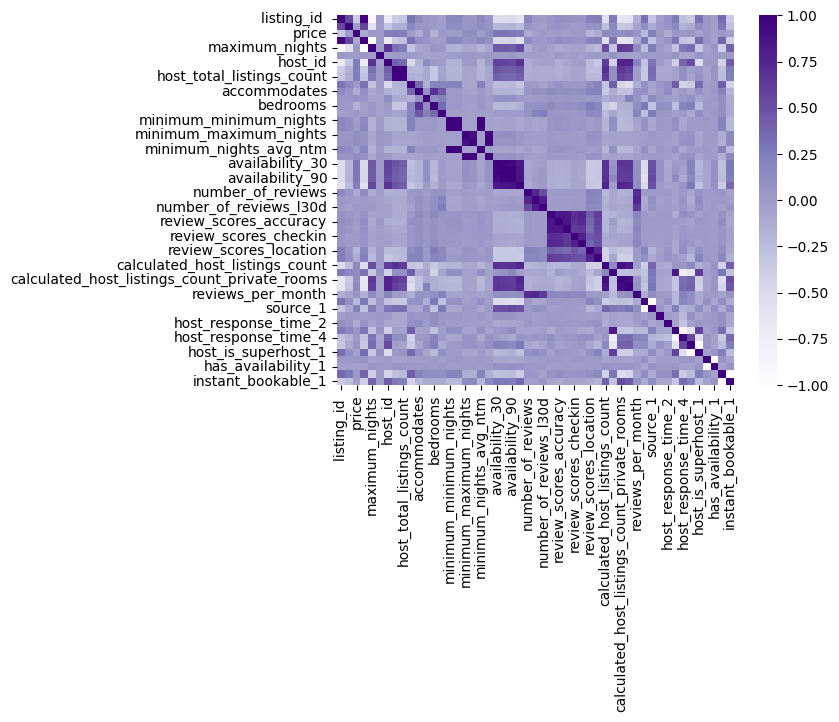

In [21]:
plt =sns.heatmap(df.corr(),cmap="Purples")

In [22]:
df_traning = df.copy()

In [23]:
training_columns = list(df_traning.columns)
training_columns.remove('price')

In [24]:
training_features= training_columns
target = ['price']

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(df[training_features],
                                                    df[target],
                                                     test_size=0.2,
                                                   random_state=67)

# **Regression**

In [26]:
from sklearn.linear_model import LinearRegression
model_l = LinearRegression()
model_l.fit(X_train, Y_train)

LinearRegression()

In [27]:
predicted=model_l.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(Y_test, predicted))
print('R Square score: %.2f' % r2_score(Y_test, predicted))

Mean squared error: 0.00
R Square score: 1.00


In [28]:
df['price'].value_counts()

,count
price,
170.0,424
235.0,365
65.0,270


In [29]:
#Predicting the room price

input_testing = list(df.iloc[0])
input_testing.remove(170)
#print(input)
new_data = np.array([input_testing])  # Example new feature values for prediction
new_prediction = model_l.predict(new_data)
print("Predicted price:", new_prediction[0],'\n')

Predicted price: [169.99999983] 



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


*Trying SGD Regressor*

In [30]:
from sklearn.linear_model import SGDRegressor
model_sgd = SGDRegressor(alpha = 0.01)
model_sgd.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.01)

In [31]:
predicted=model_sgd.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(Y_test, predicted))
print('R Square score: %.2f' % r2_score(Y_test, predicted))

Mean squared error: 3453215035130281338045179003126898313684185853722624.00
R Square score: -863671396585300960450326300896852695398219776000.00


*Normalizing the data*

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Assuming X_train and X_test are your training and testing data
scaler = MinMaxScaler()

# Fit the scaler on the training data
X_train_scaled_mm = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled_mm = scaler.transform(X_test)

In [33]:
from sklearn.linear_model import SGDRegressor
model_sgd = SGDRegressor(alpha = 0.01)
model_sgd.fit(X_train_scaled_mm, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.01)

In [34]:
predicted_scaled=model_sgd.predict(X_test_scaled_mm)
print("Mean squared error: %.2f" % mean_squared_error(Y_test, predicted_scaled))
print('R Square score: %.2f' % r2_score(Y_test, predicted_scaled))

Mean squared error: 1415.75
R Square score: 0.65


In [35]:
#Predicting the room price

input_testing = list(df.iloc[0])
input_testing.remove(170)
#print(input)
new_data = np.array([input_testing])  # Example new feature values for prediction
new_prediction = model_sgd.predict(new_data)
print("Predicted price:", new_prediction[0],'\n')

Predicted price: 8555268645.814043 



*Trying Random forest*

In [36]:
from sklearn.model_selection import KFold, cross_val_score
#scores = cross_val_score(model_l,X_train,Y_train, cv=10) #CROSS VALIDATION while doing the training
RANDOM_SEED = 42
# 10-fold CV
kfolds = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf_params = {'n_estimators': 192, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 15}
rf = RandomForestRegressor(**rf_params, random_state=43)
rf.fit(X_train, Y_train.values.ravel())

RandomForestRegressor(max_depth=20, max_features=15, min_samples_leaf=3,
                      n_estimators=192, random_state=43)

In [38]:
#Checking the score before the Optuna
predicted=rf.predict(X_test)
print("Mean squared error: %.2f"
              % mean_squared_error(Y_test, predicted))
print('R Square score: %.2f' % r2_score(Y_test, predicted))

Mean squared error: 1.78
R Square score: 1.00


In [39]:
#Predicting the room price

input_testing = list(df.iloc[0])
input_testing.remove(170)
#print(input)
new_data = np.array([input_testing])  # Example new feature values for prediction
new_prediction = rf.predict(new_data)
print("Predicted price:", new_prediction[0],'\n')

Predicted price: 169.79166666666666 



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [40]:
#Predicting the room price

input_testing = list(df.iloc[1054])
input_testing.remove(65)
#print(input)
new_data = np.array([input_testing])  # Example new feature values for prediction
new_prediction = rf.predict(new_data)
print("Predicted price:", new_prediction[0],'\n')

Predicted price: 65.25752314814815 



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [41]:
#Predicting the room price

input_testing = list(df.iloc[567])
input_testing.remove(235)
#print(input)
new_data = np.array([input_testing])  # Example new feature values for prediction
new_prediction = rf.predict(new_data)
print("Predicted price:", new_prediction[0],'\n')

Predicted price: 235.0 



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [42]:
#Steps to do after this
#1. We need to take the cleansed data and add date column to it
#2. Use mode for coordinates to fill null values
#3. Create star and snowflake schemas to support complex querying and analytics.

# **Classification**

In [ ]:
df_raw = pd.read_csv('/content/drive/MyDrive/Capstone Project/merged_output.csv')
#Handling null value of targer column
df_raw['host_is_superhost'].fillna(df_raw['host_is_superhost'].mode().iloc[0], inplace=True)

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Features and target
features = ['number_of_reviews', 'review_scores_rating', 'availability_365', 'host_listings_count']
target = 'host_is_superhost'

# Prepare the data
X = df_raw[features]
y = df_raw[target].map({'t': 1, 'f': 0})  # Map 't'/'f' to 1/0 if needed

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rfc.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_pred, predicted))
print('R Square score: %.2f' % r2_score(y_pred, predicted))
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_pred, predicted))


Mean squared error: 0.00
R Square score: 1.00
Accuracy: 1.0


In [110]:
new_data = pd.DataFrame({
        'number_of_reviews': [21],
        'review_scores_rating': [4.6],
        'availability_365': [0],
        'host_listings_count': [3]
    })

# Use the trained model to predict
prediction = rfc.predict(new_data)

# Map prediction back to human-readable output
result = "The property has a Superhost" if prediction[0] == 1 else "Not Superhost"

print(result)

The property has a Superhost


In [111]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(
  max_depth=5,
  min_samples_split=2,
  min_samples_leaf=2,
  max_features=10,
  random_state=42,
  criterion='entropy'
  )
dt.fit(X_train, Y_train)
predicted=dt.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(Y_test, predicted))
print('R Square score: %.2f' % r2_score(Y_test, predicted))
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, predicted))

Mean squared error: 5050.35
R Square score: -0.26
Accuracy: 0.4009433962264151


In [99]:
new_data = pd.DataFrame({
        'number_of_reviews': [50],
        'review_scores_rating': [5],
        'availability_365': [1],
        'host_listings_count': [3]
    })

# Use the trained model to predict
prediction = dt.predict(new_data)

# Map prediction back to human-readable output
result = "The property has a Superhost" if prediction[0] == 1 else "Not Superhost"

print(result)

Not Superhost


# **Clustering**

*   group price: Price of the listing.
*   room_type: Type of room (e.g., entire home, private room).
*   accommodates: Number of people the property accommodates.
*   bedrooms and beds: Number of bedrooms/beds.
*   availability_365: Days available in a year.





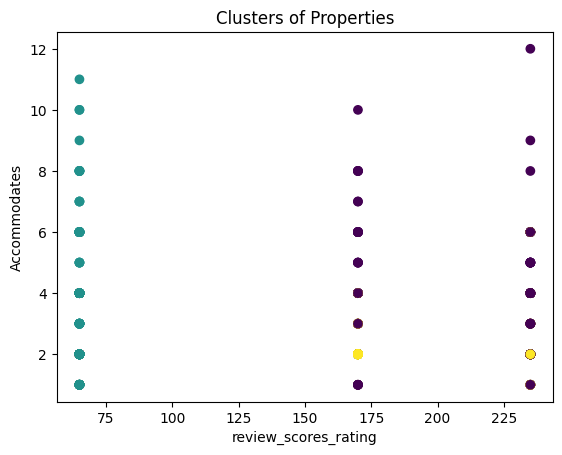

In [125]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df_cluster = pd.read_csv('/content/drive/MyDrive/Capstone Project/merged_output.csv')
#Making PRICE column as float
df_cluster['price'] = df_cluster['price'].str[1:]
df_cluster['price'] = df_cluster['price'].astype(float)

# Select features for clustering
features = ['price', 'accommodates', 'availability_365', 'review_scores_rating']
df_cluster = df_cluster[features].dropna()  # Handle missing values if any

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.scatter(df_cluster['price'], df_cluster['accommodates'], c=df_cluster['cluster'], cmap='viridis')
plt.xlabel('review_scores_rating')
plt.ylabel('Accommodates')
plt.title('Clusters of Properties')
plt.show()


Silhouette Score: 0.2652038715639421


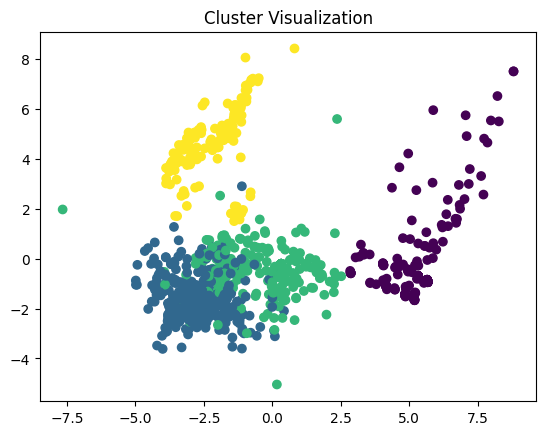

In [119]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# Evaluate the clustering
silhouette_avg = silhouette_score(data_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Visualize (optional, if data is reducible to 2D or 3D)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=clusters, cmap='viridis')
plt.title("Cluster Visualization")
plt.show()


# **A/B testing for revenue recommendation**

In [48]:
import numpy as np
from scipy.stats import ttest_ind
#using raw data,as some of the key columns are important for A/B testing
df_raw = pd.read_csv('/content/drive/MyDrive/Capstone Project/merged_output.csv')
#Making PRICE column as float
df_raw['price'] = df_raw['price'].str[1:]
df_raw['price'] = df_raw['price'].astype(float)

# **Revenue Analysis (A/B testing)**

Impact on revenue | analysing instant bookable properties

In [49]:
instant_bookable_prices = df[df_raw['instant_bookable'] == 1]['price']
instant_bookable_prices = pd.DataFrame({'price': instant_bookable_prices})
instant_bookable_prices = np.array(instant_bookable_prices)

#------------------------

non_instant_bookable_rooms = df[df_raw['instant_bookable'] == 0]['price']
non_instant_bookable_rooms = pd.DataFrame({'price': non_instant_bookable_rooms})
non_instant_bookable_rooms = np.array(non_instant_bookable_rooms)

#Revenue for A and B groups
group_a_revenue = instant_bookable_prices
group_b_revenue = non_instant_bookable_rooms

# Perform t-test
t_stat, p_value = ttest_ind(group_a_revenue, group_b_revenue)

print(f"T-test Results:\nT-statistic: {t_stat}, p-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in revenue between groups.")
else:
    print("No significant difference in revenue between groups.")

T-test Results:
T-statistic: [nan], p-value: [nan]
No significant difference in revenue between groups.


Impact on revenue | analysing host type

In [50]:
host_is_superhost = df[df_raw['host_is_superhost'] == 1]['price']
host_is_superhost = pd.DataFrame({'price': host_is_superhost})
host_is_superhost = np.array(host_is_superhost)

#----------------------

host_is_not_superhost = df[df_raw['host_is_superhost'] == 0]['price']
host_is_not_superhost = pd.DataFrame({'price': host_is_not_superhost})
host_is_not_superhost = np.array(host_is_not_superhost)

#Revenue for A and B groups
group_a_revenue = host_is_superhost
group_b_revenue = host_is_not_superhost

# Perform t-test
t_stat, p_value = ttest_ind(group_a_revenue, group_b_revenue)

print(f"T-test Results:\nT-statistic: {t_stat}, p-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in revenue between groups.")
else:
    print("No significant difference in revenue between groups.")

T-test Results:
T-statistic: [nan], p-value: [nan]
No significant difference in revenue between groups.


Impact on revenue | analysing availability of properties

In [51]:
# Assuming 'df' is your DataFrame from the previous code.
has_availablity_prices = df[df_raw['has_availability'] == 1]['price']
has_availablity_prices = pd.DataFrame({'price': has_availablity_prices})
has_availablity_prices = np.array(has_availablity_prices)

# Assuming 'df' is your DataFrame from the previous code.
does_not_have_availablity_prices = df[df_raw['has_availability'] == 0]['price']
does_not_have_availablity_prices = pd.DataFrame({'price': does_not_have_availablity_prices})
does_not_have_availablity_prices = np.array(does_not_have_availablity_prices)

#Revenue for A and B groups
group_a_revenue = has_availablity_prices
group_b_revenue = does_not_have_availablity_prices

# Perform t-test
t_stat, p_value = ttest_ind(group_a_revenue, group_b_revenue)

print(f"T-test Results:\nT-statistic: {t_stat}, p-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in revenue between groups.")
else:
    print("No significant difference in revenue between groups.")

T-test Results:
T-statistic: [nan], p-value: [nan]
No significant difference in revenue between groups.


In [52]:
single_bed = df[df_raw['beds'] == 1.0]['price']
single_bed = pd.DataFrame({'price': single_bed})
single_bed = np.array(single_bed)

#--------------

double_bed = df[df_raw['beds'] == 2.0]['price']
double_bed = pd.DataFrame({'price': double_bed})
double_bed = np.array(double_bed)

#--------------

triple_bed = df[df_raw['beds'] == 3.0]['price']
triple_bed = pd.DataFrame({'price': triple_bed})
triple_bed = np.array(triple_bed)

#--------------

four_beds = df[df_raw['beds'] == 4.0]['price']
four_beds = pd.DataFrame({'price': four_beds})
four_beds = np.array(four_beds)

from scipy.stats import f_oneway

# Perform one-way ANOVA
f_stat, p_value = f_oneway(
    single_bed,
    double_bed,
    triple_bed,four_beds)

print(f"ANOVA Results:\nF-statistic: {f_stat}, p-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in revenue between groups.")
else:
    print("No significant difference in revenue between groups.")

ANOVA Results:
F-statistic: [1.7498849], p-value: [0.15579595]
No significant difference in revenue between groups.


In [53]:
#Checking host response time

within_1_hours = df[df_raw['host_response_time'] == 'within an hour']['price']
within_1_hours = pd.DataFrame({'price': within_1_hours})
within_1_hours = np.array(within_1_hours)


within_few_hours = df[df_raw['host_response_time'] == 'within a few hours']['price']
within_few_hours = pd.DataFrame({'price': within_few_hours})
within_few_hours = np.array(within_few_hours)


within_a_day = df[df_raw['host_response_time'] == 'within a day']['price']
within_a_day = pd.DataFrame({'price': within_a_day})
within_a_day = np.array(within_a_day)


more_days = df[df_raw['host_response_time'] == 'a few days or more']['price']
more_days = pd.DataFrame({'price': more_days})
more_days = np.array(more_days)

from scipy.stats import f_oneway

# Perform one-way ANOVA
f_stat, p_value = f_oneway(
    within_1_hours,
    within_few_hours,
    within_a_day,
    more_days)

print(f"ANOVA Results:\nF-statistic: {f_stat}, p-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in revenue between groups.")
else:
    print("No significant difference in revenue between groups.")

ANOVA Results:
F-statistic: [5.81497633], p-value: [0.00062621]
There is a significant difference in revenue between groups.


In [54]:
# Check the profile pic of host


host_has_profile_pic = df[df_raw['host_has_profile_pic'] == 't']['price']
host_has_profile_pic = pd.DataFrame({'price': host_has_profile_pic})
host_has_profile_pic = np.array(host_has_profile_pic)


host_doesnt_have_profile_pic = df[df_raw['host_has_profile_pic'] == 'f']['price']
host_doesnt_have_profile_pic = pd.DataFrame({'price': host_doesnt_have_profile_pic})
host_doesnt_have_profile_pic = np.array(host_doesnt_have_profile_pic)

#Revenue for A and B groups
group_a_revenue = host_has_profile_pic
group_b_revenue = host_doesnt_have_profile_pic

# Perform t-test
t_stat, p_value = ttest_ind(group_a_revenue, group_b_revenue)

print(f"T-test Results:\nT-statistic: {t_stat}, p-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in revenue between groups.")
else:
    print("No significant difference in revenue between groups.")

T-test Results:
T-statistic: [-4.08767103], p-value: [4.70743631e-05]
There is a significant difference in revenue between groups.


In [55]:
# Checking the host identity

host_identity_verified = df[df_raw['host_identity_verified'] == 't']['price']
host_identity_verified = pd.DataFrame({'price': host_identity_verified})
host_identity_verified = np.array(host_identity_verified)

host_identity_not_verified = df[df_raw['host_identity_verified'] == 'f']['price']
host_identity_not_verified = pd.DataFrame({'price': host_identity_not_verified})
host_identity_not_verified = np.array(host_identity_not_verified)

#Revenue for A and B groups
group_a_revenue = host_identity_verified
group_b_revenue = host_identity_not_verified

# Perform t-test
t_stat, p_value = ttest_ind(group_a_revenue, group_b_revenue)

print(f"T-test Results:\nT-statistic: {t_stat}, p-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in revenue between groups.")
else:
    print("No significant difference in revenue between groups.")

T-test Results:
T-statistic: [1.95925348], p-value: [0.05036119]
No significant difference in revenue between groups.
